In [1]:
!pip install Scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

     |████████████████████████████████| 1.0MB 4.3MB/s 
  Created wheel for Scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=4a7f6250fc615645b756b09cd8160b481ae73a31a029d458197feb7b924e167f
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built Scikit-fuzzy


In [36]:
flow=ctrl.Antecedent(np.arange(0,13,1), 'flow')
freq=ctrl.Antecedent(np.arange(0,14,1), 'freq')
volt=ctrl.Consequent(np.arange(0,132, 1), 'volt')

In [39]:
flow.automf(5)
freq.automf(5)

In [40]:
volt['VL']=fuzz.trimf(volt.universe,[0,0,90])
volt['L']=fuzz.trimf(volt.universe, [22,50,95])
volt['A']=fuzz.trimf(volt.universe, [50, 70, 90])
volt['H']=fuzz.trimf(volt.universe, [70, 90, 110])
volt['VH']=fuzz.trimf(volt.universe, [90, 110, 120])

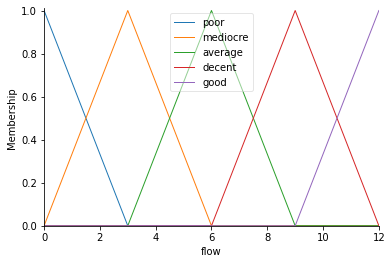

In [41]:
flow.view()

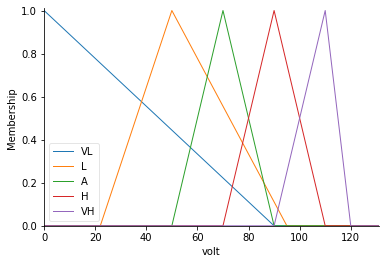

In [42]:
volt.view()

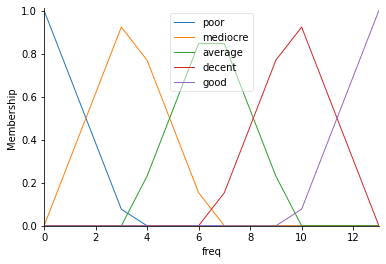

In [43]:
freq.view()

In [44]:
rule1=ctrl.Rule(flow['poor']| freq['poor'], volt['VL'])
rule2=ctrl.Rule(flow['mediocre']| freq['poor'], volt['L'])
rule3=ctrl.Rule(flow['good']| freq['average'], volt['H'])
rule4=ctrl.Rule(flow['good']| freq['good'], volt['VH'])
rule5=ctrl.Rule(flow['decent']| freq['poor'], volt['A'])
rule6=ctrl.Rule(flow['average']| freq['average'], volt['A'])

In [45]:
volt_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])

In [46]:
volting=ctrl.ControlSystemSimulation(volt_ctrl)

In [47]:
volting.input['flow']=8
volting.input['freq']=4

In [48]:
volting.compute()

In [49]:
print(volting.output['volt'])

75.71015157022974


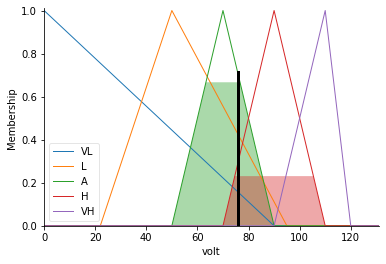

In [50]:
volt.view(sim=volting)